In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
gda_path = "https://data.netlab.360.com/feeds/dga/dga.txt"
domains_price = "http://www.wanmi.cc/ls/?p=1"

# Extract GDA

In [ ]:
gda_urls = pd.read_csv(gda_path, skiprows=18, sep=' ')

In [ ]:
gda_domains = pd.read_csv(gda_path, skiprows=18, encoding='utf-8', header=None, sep='\t')

In [ ]:
gda_domains.columns = ['DGA', 'domain_name', 'start', 'end']
gda_domains.to_csv('gda_domains.csv')
gda_domains.head(5)

,DGA,domain_name,start,end
0,nymaim,uaxndirn.net,2022-05-29 00:00:00,2022-05-29 23:59:59
1,nymaim,opvqiw.com,2022-05-29 00:00:00,2022-05-29 23:59:59
2,nymaim,gkasscbc.com,2022-05-29 00:00:00,2022-05-29 23:59:59
3,nymaim,arwlcyc.info,2022-05-29 00:00:00,2022-05-29 23:59:59
4,nymaim,slbxclpn.biz,2022-05-29 00:00:00,2022-05-29 23:59:59


Get domain

In [ ]:
gda_domains['domain'] = gda_domains['domain_name'].apply(lambda x: ''.join(x.split('.')[:-1]))
gda_domains.head()

,DGA,domain_name,start,end,domain
0,nymaim,uaxndirn.net,2022-05-29 00:00:00,2022-05-29 23:59:59,uaxndirn
1,nymaim,opvqiw.com,2022-05-29 00:00:00,2022-05-29 23:59:59,opvqiw
2,nymaim,gkasscbc.com,2022-05-29 00:00:00,2022-05-29 23:59:59,gkasscbc
3,nymaim,arwlcyc.info,2022-05-29 00:00:00,2022-05-29 23:59:59,arwlcyc
4,nymaim,slbxclpn.biz,2022-05-29 00:00:00,2022-05-29 23:59:59,slbxclpn


 Alexa domains

In [ ]:
alexa_domains = pd.read_csv('top1M domain', sep = '\t')
alexa_domains.columns = ['domain_name', 'visit', 'rank']
alexa_domains.head()

,domain_name,visit,rank
0,www.baidu.com,1.237875e+10,2
1,conn3.coloros.com,1.234599e+10,3
2,dns.weixin.qq.com.cn,1.224574e+10,4
3,conn4.coloros.com,1.201956e+10,5
4,conn1.oppomobile.com,1.167518e+10,6


Get domain

In [ ]:
alexa_domains['domain'] = alexa_domains['domain_name'].apply(lambda x: ''.join(x.split('.')[:-1]))
alexa_domains.head()

,domain_name,visit,rank,domain
0,www.baidu.com,1.237875e+10,2,wwwbaidu
1,conn3.coloros.com,1.234599e+10,3,conn3coloros
2,dns.weixin.qq.com.cn,1.224574e+10,4,dnsweixinqqcom
3,conn4.coloros.com,1.201956e+10,5,conn4coloros
4,conn1.oppomobile.com,1.167518e+10,6,conn1oppomobile


Label domain category, gda domains as 'b'(black), alexa domains as 'w'(white)

In [ ]:
gda_domains['cat'] = 'b'
alexa_domains['cat'] = 'w'

In [ ]:
domains = pd.concat([gda_domains[['domain', 'cat']], alexa_domains[['domain', 'cat']]])
domains

,domain,cat
0,uaxndirn,b
1,opvqiw,b
2,gkasscbc,b
3,arwlcyc,b
4,slbxclpn,b
...,...,...
999994,ndsv1-1h8pp70-9c-9c-82g0ud0cachenode,w
999995,ndsv1-1h8q080-9c-9c-7ubgvr1jdcloudstatus,w
999996,files-shpfmageworx,w
999997,ndsv1-1h8pb50-9c-9c-dv5mrr1cachenode,w


Check data balance

In [ ]:
domains['cat'].value_counts(normalize=True)

b    0.503533
w    0.496467
Name: cat, dtype: float64

Add a feature - length of domain

In [ ]:
domains['len'] = domains['domain'].apply(lambda x: len(x))
domains.head()

,domain,cat,len
0,uaxndirn,b,8
1,opvqiw,b,6
2,gkasscbc,b,8
3,arwlcyc,b,7
4,slbxclpn,b,8


Check relationship of len and category

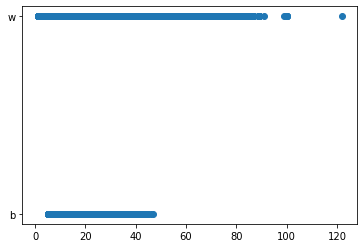

In [ ]:
plt.scatter(domains['len'], domains['cat'])

When len < 6 or len > 45, domain is white. Remove data with len < 6 or len > 45, add more feature to classify.

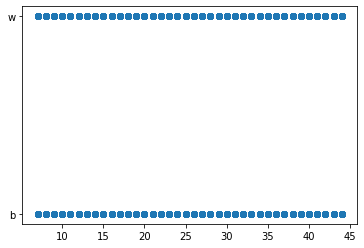

In [ ]:
#domains = domains[(domains['len'] > 6) & (domains['len'] < 45)]
#domains['cat'].value_counts()
norlen_domains = domains[(domains['len'] > 6) & (domains['len'] < 45)]
norlen_domains['cat'].value_counts(normalize=True)
plt.scatter(norlen_domains['len'], norlen_domains['cat'])

Add feature - entropy

In [ ]:
import math
from collections import Counter

def entropy(s):
  p, lns = Counter(s), float(len(s))
  return -sum(count/lns * math.log(count/lns, 2) for count in p.values())
norlen_domains['entropy'] = [entropy(x) for x in norlen_domains['domain']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
norlen_domains.head()

,domain,cat,len,entropy
0,uaxndirn,b,8,2.750000
2,gkasscbc,b,8,2.500000
3,arwlcyc,b,7,2.521641
4,slbxclpn,b,8,2.750000
6,mcwsijop,b,8,3.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Domain Entropy')

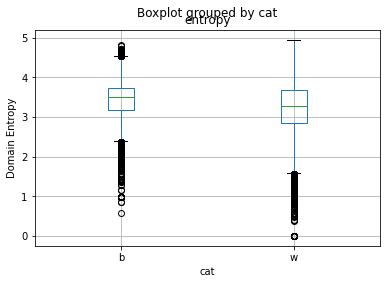

In [ ]:
norlen_domains.boxplot('entropy', 'cat')
plt.ylabel('Domain Entropy')

Scatter plots

Text(0, 0.5, 'Domain Entropy')

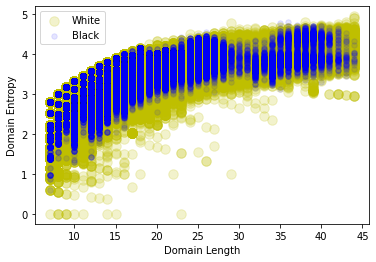

In [ ]:
cond = norlen_domains['cat'] == 'b'
blacks = norlen_domains[cond]
whites = norlen_domains[~cond]
plt.scatter(whites['len'], whites['entropy'], s=90, c='y', label='White', alpha=0.2)
plt.scatter(blacks['len'], blacks['entropy'], s=30, c='b', label='Black', alpha=0.1)
plt.legend()
plt.xlabel('Domain Length')
plt.ylabel('Domain Entropy')

High-entropy, low-entropy data analysis

In [ ]:
high_entropy_domains = norlen_domains[norlen_domains['entropy'] > 4]
low_entropy_domains = norlen_domains[norlen_domains['entropy'] < 2]
print(high_entropy_domains['cat'].value_counts())
print(low_entropy_domains['cat'].value_counts())

w    106058
b     19442
Name: cat, dtype: int64
w    13937
b     1291
Name: cat, dtype: int64


When entropy > 4 or entropy < 2, most domains are white

In [ ]:
from sklearn.utils import shuffle
all_domains = shuffle(norlen_domains)
X = all_domains[['len', 'entropy']].values
y = np.array(all_domains['cat'].tolist())

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5, n_jobs=-1)
print(scores)

[0.769947   0.76770755 0.76962782 0.768427   0.76871417]


Confusion Matrix

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


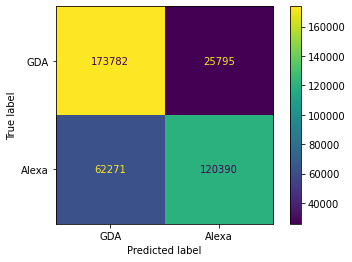

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(
    clf,
    X_test,
    y_test,
    values_format = '.0f',
    display_labels = ['GDA', 'Alexa']
)

Optimize model, add more features

Add NGram using Alexa domains

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
alexa_vc = CountVectorizer(analyzer='char', ngram_range=(3,5))

alexa_counts_matrix = alexa_vc.fit_transform(whites['domain'])
alexa_counts = np.log10(alexa_counts_matrix.sum(axis=0).getA1())
alexa_ngrams_list = alexa_vc.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Top 10 white NGram domains

In [ ]:
import operator
sorted_ngrams = sorted(zip(alexa_ngrams_list, alexa_counts), key=operator.itemgetter(1), reverse=True)
print('Top NGrams in alexa domains: ')
for ngram, count in sorted_ngrams[:10]:
  print(ngram, count)

Top NGrams in alexa domains: 
www 5.260080932813855
com 4.9461770591582725
-9c 4.826236822654917
9c- 4.8259775617073455
-9c- 4.825945143203848
cdn 4.816592571748946
1-1 4.607915881388089
ang 4.588484599044793
oud 4.583119391743568
lou 4.582108836392919


Bottom 10 white NGram domains

In [ ]:
for ngram, count in sorted_ngrams[-30:]:
  print(ngram, count)

zzzym 0.0
zzzyn 0.0
zzzyq 0.0
zzzys 0.0
zzzyz 0.0
zzzz0 0.0
zzzzb 0.0
zzzzf 0.0
zzzzg 0.0
zzzzi 0.0
zzzzm 0.0
zzzzp 0.0
zzzzw 0.0
{lo 0.0
{log 0.0
{log- 0.0
{sm 0.0
{sma 0.0
{smar 0.0
{te 0.0
{ten 0.0
{tend 0.0
{wo 0.0
{wow 0.0
{wowi 0.0
{ww 0.0
{www 0.0
{wwwt 0.0
~da 0.0
~dai 0.0


Domains with non alphabet characters are outliers. Remove outlier domains from Alexa domains

In [ ]:
new_whites = whites[~whites.domain.str.contains(r'[{~]')]

In [ ]:
alexa_counts_matrix = alexa_vc.fit_transform(new_whites['domain'])
alexa_counts = np.log10(alexa_counts_matrix.sum(axis=0).getA1())
alexa_ngrams_list = alexa_vc.get_feature_names()
import operator
sorted_ngrams = sorted(zip(alexa_ngrams_list, alexa_counts), key=operator.itemgetter(1), reverse=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Top NGrams in alexa domains: 
zzzua 0.0
zzzue 0.0
zzzuf 0.0
zzzui 0.0
zzzv2 0.0
zzzva 0.0
zzzvc 0.0
zzzwg 0.0
zzzwl 0.0
zzzxb 0.0
zzzxg 0.0
zzzxj 0.0
zzzxx 0.0
zzzxz 0.0
zzzy1 0.0
zzzyj 0.0
zzzyl 0.0
zzzym 0.0
zzzyn 0.0
zzzyq 0.0
zzzys 0.0
zzzyz 0.0
zzzz0 0.0
zzzzb 0.0
zzzzf 0.0
zzzzg 0.0
zzzzi 0.0
zzzzm 0.0
zzzzp 0.0
zzzzw 0.0


In [ ]:
print('Top NGrams in alexa domains: ')
for ngram, count in sorted_ngrams[:10]:
  print(ngram, count)
print('Bottom NGrams in alexa domains: ')
for ngram, count in sorted_ngrams[-30:]:
  print(ngram, count)

Top NGrams in alexa domains: 
www 5.2600785466263265
com 4.9461770591582725
-9c 4.826236822654917
9c- 4.8259775617073455
-9c- 4.825945143203848
cdn 4.816592571748946
1-1 4.607915881388089
ang 4.588484599044793
oud 4.583119391743568
lou 4.582108836392919
Bottom NGrams in alexa domains: 
zzzua 0.0
zzzue 0.0
zzzuf 0.0
zzzui 0.0
zzzv2 0.0
zzzva 0.0
zzzvc 0.0
zzzwg 0.0
zzzwl 0.0
zzzxb 0.0
zzzxg 0.0
zzzxj 0.0
zzzxx 0.0
zzzxz 0.0
zzzy1 0.0
zzzyj 0.0
zzzyl 0.0
zzzym 0.0
zzzyn 0.0
zzzyq 0.0
zzzys 0.0
zzzyz 0.0
zzzz0 0.0
zzzzb 0.0
zzzzf 0.0
zzzzg 0.0
zzzzi 0.0
zzzzm 0.0
zzzzp 0.0
zzzzw 0.0
